# What factors to use for prediction of WORK LIFE BALANCE SCORE (WLB) of employees.

Multiple linear regression to be performed to find the answer.

## Import the neccessary libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

CSV format: fau_clinic_employee_wellbeing.csv

In [2]:
df = pd.read_csv("fau_clinic_employee_wellbeing.csv", sep = ',')

## Data transformations.

Remove incorrect data for column 

In [3]:
df = df[df['DAILY_STRESS'] != '1/1/2000']
print(df['DAILY_STRESS'].unique())
# print(df.columns)


['2' '3' '1' '4' '5' '0']


Turn string columns to numerical format.

In [4]:
# mapped to binary 0 and 1
df['GENDER_NUMERIC'] = df['GENDER'].map({'Female': 0, 'Male': 1})

# mapped at age midpoint
df['AGE_NUMERIC'] = df['AGE'].map({
    'Less than 20': 10,
    '21 to 35': 28,
    '36 to 50': 43,
    '51 or more': 55
})
df['DAILY_STRESS_INT'] = df['DAILY_STRESS'].map({
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
})
print(df['GENDER_NUMERIC'].unique())
print(df['AGE_NUMERIC'].unique())
print(df['DAILY_STRESS_INT'].unique())
# df = df.drop(columns=['AGE', 'GENDER'], errors='ignore')

[0 1]
[43 55 28 10]
[2 3 1 4 5 0]


In [5]:
df = df.drop(columns=['AGE', 'GENDER', 'DAILY_STRESS'], errors='ignore')

In [6]:
print(df.head(3))

   SOCIAL_NETWORK  ACHIEVEMENT  BMI_RANGE  TODO_COMPLETED  DAILY_STEPS  \
0               5            2          1               6            5   
1              10            5          2               5            5   
2              10            3          2               2            4   

   SLEEP_HOURS  SUFFICIENT_INCOME  PERSONAL_AWARDS  TIME_FOR_HOBBY  \
0            7                  1                4               0   
1            8                  2                3               2   
2            8                  2                4               8   

   WEEKLY_MEDITATION  WORK_LIFE_BALANCE_SCORE  GENDER_NUMERIC  AGE_NUMERIC  \
0                  5                    609.5               0           43   
1                  6                    655.6               0           43   
2                  3                    631.6               0           43   

   DAILY_STRESS_INT  
0                 2  
1                 3  
2                 3  


## Dependent variable (y) and the independent variable (x). 
In our case the dependent variable would be the work-life-balance score and all of the other variables would be independent. 

In [7]:
x = df.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df['WORK_LIFE_BALANCE_SCORE']

## Training set and test set
We have to divide our dataset to the training set and test set. 

First we train the model and then test how it works. 

70-30 split (70% training, 30% testing).


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Train the model on the training set

Now we train our model with the help of LinearRegression function.

In [9]:
from sklearn.linear_model import LinearRegression 
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

## Evaluate the model

(1) Use r2 score. The closer this score is to 1 the more precise the model is. 

The r2 score is around 0.85, which means that 85% of the variability observed in the WLB score is explained by the regression model. This value indicates that the model fits the data well.

In [10]:
from sklearn.metrics import r2_score
y_pred = ml.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"r2 Score: {r2}")

r2 Score: 0.8505587127619704


(2) A tabular form of the difference between the real value found in the dataset and the predicted value by the trained model.


In [11]:

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
results['Relative_Difference (%)'] = abs(results['Difference']
                                          / results['Actual']) * 100

print(results.head(7)) 


       Actual   Predicted  Difference  Relative_Difference (%)
10731   644.3  625.585421   18.714579                 2.904637
476     563.7  594.369123  -30.669123                 5.440682
4291    616.7  625.713859   -9.013859                 1.461628
1402    704.3  680.135319   24.164681                 3.431021
6497    744.2  753.329953   -9.129953                 1.226814
937     712.5  719.392166   -6.892166                 0.967322
7831    695.8  682.402592   13.397408                 1.925468


The predicted values are reasonably close to the actual values. The model captures the relationship between the features and the target variable but there is room for improvement. The model also overestimates in some instances, especially for lower and higher scores.

(3) WLB score of an employee: a new record of the employee. 

In [12]:
new_employee = pd.DataFrame({
    "SOCIAL_NETWORK": [2],
    "ACHIEVEMENT": [2],
    "BMI_RANGE": [1],
    "TODO_COMPLETED": [6],
    "DAILY_STEPS": [1],
    "SLEEP_HOURS": [2],
    "SUFFICIENT_INCOME": [4],
    "PERSONAL_AWARDS": [4],
    "TIME_FOR_HOBBY": [2],
    "WEEKLY_MEDITATION": [4],
    "GENDER_NUMERIC": [1], 
    "AGE_NUMERIC": [30],
    "DAILY_STRESS_INT": [4]
})
predicted_value = ml.predict(new_employee)

print(predicted_value)

[648.55520946]


The model predicted the WLB score of this employee: 648.55.

We can say that model predicts pretty good.


####  (Optional) Plot the results



Text(0.5, 1.0, 'Actual vs. Predicted')

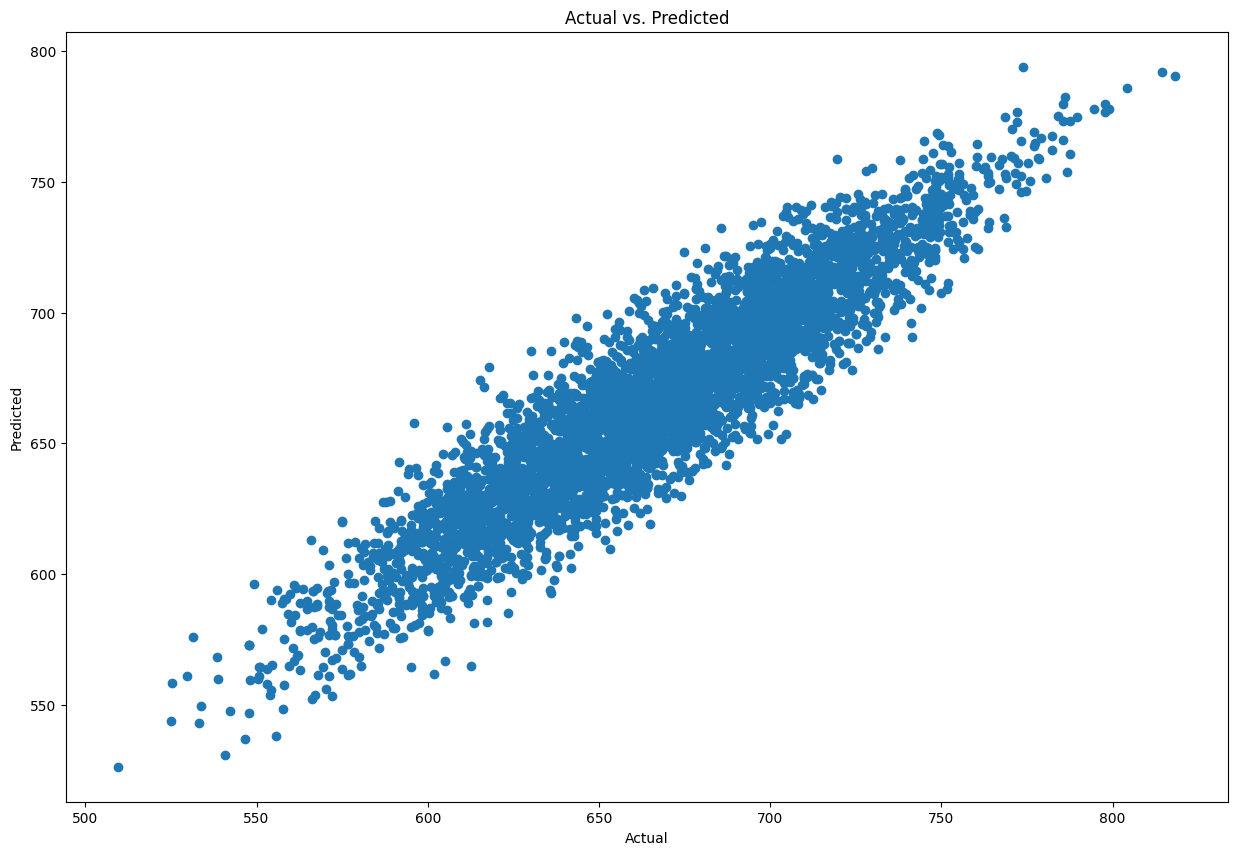

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

Linear correlation between actual and predicted values which shows that our model is appropriate. 

## The summary of the model


In [14]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.992      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         176315.1730
Date:                   2025-09-20 14:13        BIC:                         176414.9939
No. Observations:       15971                   Log-Likelihood:              -88145.    
Df Model:               13                      F-statistic:                 1.493e+05  
Df Residuals:           15958                   Prob (F-statistic):          0.00       
R-squared (uncentered): 0.992                   Scale:                       3644.7     
--------------------------------------------------------------------------------------------
                         Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
--------------------------------------------------------------------------------------------
SOCIAL_NETWORK           5.5977       

#### Interpretation

1. Most variables (social network, sleep hours, income, daily steps) show strong positive relationships with work-life balance.
2. All variables in the model are statistically significant, indicating they all have an impact on work-life balance.